In [20]:
from warnings import filterwarnings
filterwarnings('ignore')

In [21]:
!pip install tweepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
import tweepy,codecs

api_key = '*******'
api_key_secret = '*********'
access_token = '**************'
access_token_secret = '******************'


auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [23]:
tweetler = api.search(q = "#datascience", lang = "en", count = 5000)

In [24]:
def hashtag_df(tweetler):
    import pandas as pd
    id_list = [tweet.id for tweet  in tweetler]
    df = pd.DataFrame(id_list, columns = ["id"])
    
    df["text"] = [tweet.text for tweet in tweetler]
    df["created_at"] = [tweet.created_at for tweet in tweetler]
    df["retweeted"] = [tweet.retweeted for tweet in tweetler]
    df["retweet_count"] = [tweet.retweet_count for tweet in tweetler]
    df["source"] = [tweet.source for tweet in tweetler]
    df["user_screen_name"] = [tweet.author.screen_name for tweet in tweetler]
    df["user_followers_count"] = [tweet.author.followers_count for tweet in tweetler]
    df["user_location"] = [tweet.author.location for tweet in tweetler]
    df["Hashtags"] = [tweet.entities.get('hashtags') for tweet in tweetler]
    
    return df

In [25]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [26]:
df = hashtag_df(tweetler)

#uppercase-lowercase transformation
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#Punctuation
df['text'] = df['text'].str.replace('[^\w\s]','')

#numbers
df['text'] = df['text'].str.replace('\d','')

#stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

#lemmi
from textblob import Word
nltk.download('wordnet')
#df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

#Punctuation
df['text'] = df['text'].str.replace('rt','')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [27]:
df["text"]

0      manutesh developers dataanalytics datascience...
1      dataclaudius todays code written prevent fail...
2      dataclaudius text classification viakdnuggets...
3     text classification viakdnuggets datascience a...
4     developers dataanalytics datascience long take...
                            ...                        
89     maryeti buy verified paypal accounts safe usa...
90     georgiapapachar happy share alangousis new pa...
91     kondoriraghu httpstcocpejnkpbv bin chic catch...
92     kondoriraghu quality domains name httpstcoath...
93     bigdataconf harnessing power aificialintellig...
Name: text, Length: 94, dtype: object

In [28]:
import pandas as pd
freq_df = df["text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis =0).reset_index()

In [29]:
freq_df.columns = ["words","frequencies"]

In [30]:
freq_df.shape

(555, 2)

In [31]:
freq_df[freq_df.frequencies > freq_df.frequencies.mean() + 
        freq_df.frequencies.std()]

,words,frequencies
0,,81.0
4,datascience,40.0
22,ai,27.0
23,ml,8.0
24,data,27.0
25,bigdata,17.0
35,via,7.0
37,machinelearning,24.0
38,analytics,18.0
39,iiot,9.0


In [32]:
a = freq_df[freq_df.frequencies > freq_df.frequencies.mean() + 
        freq_df.frequencies.std()]

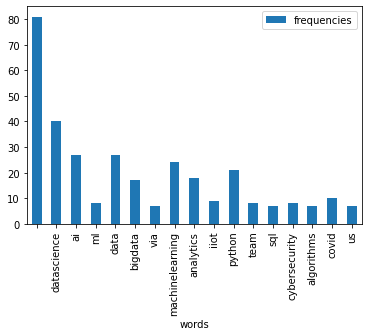

In [33]:
a.plot.bar(x = "words",y = "frequencies");

## Word cloud

In [34]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [36]:
text = " ".join(i for i in df.text)
text

' manutesh developers dataanalytics datascience long take break coding without feeling dumb days  dataclaudius todays code written prevent failure thats problem viakdnuggets datascience ai ml data bigdata  dataclaudius text classification viakdnuggets datascience ai ml data bigdata httpstcoclwokztpqa text classification viakdnuggets datascience ai ml data bigdata httpstcoclwokztpqa developers dataanalytics datascience long take break coding without feeling dumb days todays code written prevent failure thats problem viakdnuggets datascience ai ml data httpstcorhfhaqnq  _qunt project ideas web developer via ingliguori machinelearning datascience bigdata analytics ai iiot python rstats  wellerross looking hire data scientist join team pff info httpstcoslbuumijcr maybe get stat  ingliguori infographic dataanalytics processes via ingliguori bigdata analytics datascience ai iot iiot pytorch python r  codersleaf privacy matters webdevelopment sql javascript github git web devops developer dat

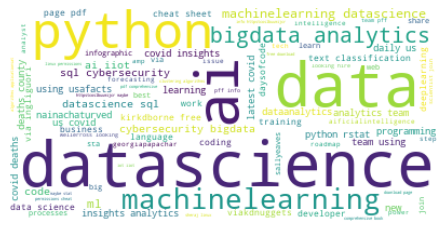

In [37]:
wordcloud = WordCloud(background_color = "white").generate(text)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [38]:
vbo_mask = np.array(Image.open("VBO.jpg"))

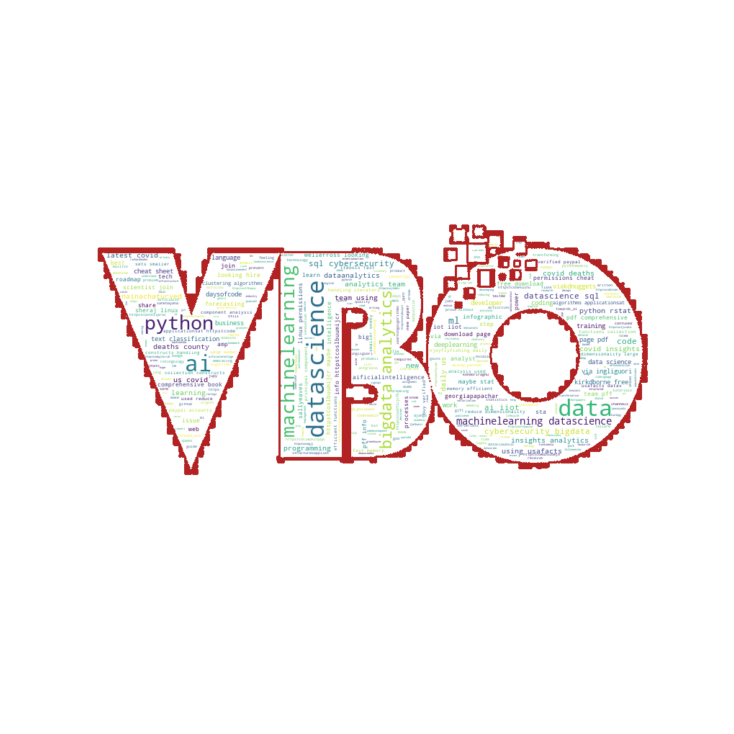

In [39]:
wc = WordCloud(background_color = "white", 
               max_words = 1000, 
               mask = vbo_mask,
              contour_width = 3, 
              contour_color = "firebrick")

wc.generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# Twitter Sentiment Analysis

In [40]:
df.head()

,id,text,created_at,retweeted,retweet_count,source,user_screen_name,user_followers_count,user_location,Hashtags
0,1552689074779164675,manutesh developers dataanalytics datascience...,2022-07-28 16:14:57,False,1,aiapps-bot,uCloudifyAI,891,,"[{'text': 'developers', 'indices': [15, 26]}, ..."
1,1552689059721613315,dataclaudius todays code written prevent fail...,2022-07-28 16:14:54,False,1,Calcaware,Calcaware,9193,"Austin, TX","[{'text': 'datascience', 'indices': [104, 116]..."
2,1552689059105062912,dataclaudius text classification viakdnuggets...,2022-07-28 16:14:53,False,1,Calcaware,Calcaware,9193,"Austin, TX","[{'text': 'datascience', 'indices': [61, 73]},..."
3,1552689053274972164,text classification viakdnuggets datascience a...,2022-07-28 16:14:52,False,1,IFTTT,dataclaudius,3139,Zürich CH,"[{'text': 'datascience', 'indices': [43, 55]},..."
4,1552689052046049281,developers dataanalytics datascience long take...,2022-07-28 16:14:52,False,1,Twitter for Android,Manutesh1,49,Nairobi-Kenya,"[{'text': 'developers', 'indices': [0, 11]}, {..."


In [41]:
from textblob import TextBlob

In [42]:
df['sentiment_score'] = 0
df.head()

,id,text,created_at,retweeted,retweet_count,source,user_screen_name,user_followers_count,user_location,Hashtags,sentiment_score
0,1552689074779164675,manutesh developers dataanalytics datascience...,2022-07-28 16:14:57,False,1,aiapps-bot,uCloudifyAI,891,,"[{'text': 'developers', 'indices': [15, 26]}, ...",0
1,1552689059721613315,dataclaudius todays code written prevent fail...,2022-07-28 16:14:54,False,1,Calcaware,Calcaware,9193,"Austin, TX","[{'text': 'datascience', 'indices': [104, 116]...",0
2,1552689059105062912,dataclaudius text classification viakdnuggets...,2022-07-28 16:14:53,False,1,Calcaware,Calcaware,9193,"Austin, TX","[{'text': 'datascience', 'indices': [61, 73]},...",0
3,1552689053274972164,text classification viakdnuggets datascience a...,2022-07-28 16:14:52,False,1,IFTTT,dataclaudius,3139,Zürich CH,"[{'text': 'datascience', 'indices': [43, 55]},...",0
4,1552689052046049281,developers dataanalytics datascience long take...,2022-07-28 16:14:52,False,1,Twitter for Android,Manutesh1,49,Nairobi-Kenya,"[{'text': 'developers', 'indices': [0, 11]}, {...",0


In [43]:
df.sentiment_score

0     0
1     0
2     0
3     0
4     0
     ..
89    0
90    0
91    0
92    0
93    0
Name: sentiment_score, Length: 94, dtype: int64

In [44]:
df['emotion_class'] = 0

In [45]:
df

,id,text,created_at,retweeted,retweet_count,source,user_screen_name,user_followers_count,user_location,Hashtags,sentiment_score,emotion_class
0,1552689074779164675,manutesh developers dataanalytics datascience...,2022-07-28 16:14:57,False,1,aiapps-bot,uCloudifyAI,891,,"[{'text': 'developers', 'indices': [15, 26]}, ...",0,0
1,1552689059721613315,dataclaudius todays code written prevent fail...,2022-07-28 16:14:54,False,1,Calcaware,Calcaware,9193,"Austin, TX","[{'text': 'datascience', 'indices': [104, 116]...",0,0
2,1552689059105062912,dataclaudius text classification viakdnuggets...,2022-07-28 16:14:53,False,1,Calcaware,Calcaware,9193,"Austin, TX","[{'text': 'datascience', 'indices': [61, 73]},...",0,0
3,1552689053274972164,text classification viakdnuggets datascience a...,2022-07-28 16:14:52,False,1,IFTTT,dataclaudius,3139,Zürich CH,"[{'text': 'datascience', 'indices': [43, 55]},...",0,0
4,1552689052046049281,developers dataanalytics datascience long take...,2022-07-28 16:14:52,False,1,Twitter for Android,Manutesh1,49,Nairobi-Kenya,"[{'text': 'developers', 'indices': [0, 11]}, {...",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
89,1552686896299577349,maryeti buy verified paypal accounts safe usa...,2022-07-28 16:06:18,False,18,AiSpaceBot,godfrey_G_,3896,"Johannesburg, South Africa","[{'text': 'MachineLearning', 'indices': [104, ...",0,0
90,1552686894617591808,georgiapapachar happy share alangousis new pa...,2022-07-28 16:06:17,False,10,AiSpaceBot,godfrey_G_,3896,"Johannesburg, South Africa","[{'text': 'Probabilistic', 'indices': [75, 89]...",0,0
91,1552686883913797632,kondoriraghu httpstcocpejnkpbv bin chic catch...,2022-07-28 16:06:15,False,5,AiSpaceBot,godfrey_G_,3896,"Johannesburg, South Africa","[{'text': 'twitme', 'indices': [93, 100]}, {'t...",0,0
92,1552686873046401026,kondoriraghu quality domains name httpstcoath...,2022-07-28 16:06:12,False,3,AiSpaceBot,godfrey_G_,3896,"Johannesburg, South Africa","[{'text': 'domains', 'indices': [26, 34]}, {'t...",0,0


In [46]:
def sentiment_score(df):

    text = df["text"]

    for i in range(0,len(text)):
        textB = TextBlob(text[i])
        sentiment_score = textB.sentiment.polarity
        df.sentiment_score = sentiment_score
        
        if sentiment_score <0.00:
            emotion_class = 'Negative'
            df.emotion_class = emotion_class 

        elif sentiment_score > 0.00:
            emotion_class = 'Positive'
            df.emotion_class = emotion_class 

        else:
            emotion_class = 'Notr'
            df.emotion_class = emotion_class 
            
    return df 

In [47]:
df.head()

,id,text,created_at,retweeted,retweet_count,source,user_screen_name,user_followers_count,user_location,Hashtags,sentiment_score,emotion_class
0,1552689074779164675,manutesh developers dataanalytics datascience...,2022-07-28 16:14:57,False,1,aiapps-bot,uCloudifyAI,891,,"[{'text': 'developers', 'indices': [15, 26]}, ...",0,0
1,1552689059721613315,dataclaudius todays code written prevent fail...,2022-07-28 16:14:54,False,1,Calcaware,Calcaware,9193,"Austin, TX","[{'text': 'datascience', 'indices': [104, 116]...",0,0
2,1552689059105062912,dataclaudius text classification viakdnuggets...,2022-07-28 16:14:53,False,1,Calcaware,Calcaware,9193,"Austin, TX","[{'text': 'datascience', 'indices': [61, 73]},...",0,0
3,1552689053274972164,text classification viakdnuggets datascience a...,2022-07-28 16:14:52,False,1,IFTTT,dataclaudius,3139,Zürich CH,"[{'text': 'datascience', 'indices': [43, 55]},...",0,0
4,1552689052046049281,developers dataanalytics datascience long take...,2022-07-28 16:14:52,False,1,Twitter for Android,Manutesh1,49,Nairobi-Kenya,"[{'text': 'developers', 'indices': [0, 11]}, {...",0,0


In [48]:
sentiment_score(df)

,id,text,created_at,retweeted,retweet_count,source,user_screen_name,user_followers_count,user_location,Hashtags,sentiment_score,emotion_class
0,1552689074779164675,manutesh developers dataanalytics datascience...,2022-07-28 16:14:57,False,1,aiapps-bot,uCloudifyAI,891,,"[{'text': 'developers', 'indices': [15, 26]}, ...",0.0,Notr
1,1552689059721613315,dataclaudius todays code written prevent fail...,2022-07-28 16:14:54,False,1,Calcaware,Calcaware,9193,"Austin, TX","[{'text': 'datascience', 'indices': [104, 116]...",0.0,Notr
2,1552689059105062912,dataclaudius text classification viakdnuggets...,2022-07-28 16:14:53,False,1,Calcaware,Calcaware,9193,"Austin, TX","[{'text': 'datascience', 'indices': [61, 73]},...",0.0,Notr
3,1552689053274972164,text classification viakdnuggets datascience a...,2022-07-28 16:14:52,False,1,IFTTT,dataclaudius,3139,Zürich CH,"[{'text': 'datascience', 'indices': [43, 55]},...",0.0,Notr
4,1552689052046049281,developers dataanalytics datascience long take...,2022-07-28 16:14:52,False,1,Twitter for Android,Manutesh1,49,Nairobi-Kenya,"[{'text': 'developers', 'indices': [0, 11]}, {...",0.0,Notr
...,...,...,...,...,...,...,...,...,...,...,...,...
89,1552686896299577349,maryeti buy verified paypal accounts safe usa...,2022-07-28 16:06:18,False,18,AiSpaceBot,godfrey_G_,3896,"Johannesburg, South Africa","[{'text': 'MachineLearning', 'indices': [104, ...",0.0,Notr
90,1552686894617591808,georgiapapachar happy share alangousis new pa...,2022-07-28 16:06:17,False,10,AiSpaceBot,godfrey_G_,3896,"Johannesburg, South Africa","[{'text': 'Probabilistic', 'indices': [75, 89]...",0.0,Notr
91,1552686883913797632,kondoriraghu httpstcocpejnkpbv bin chic catch...,2022-07-28 16:06:15,False,5,AiSpaceBot,godfrey_G_,3896,"Johannesburg, South Africa","[{'text': 'twitme', 'indices': [93, 100]}, {'t...",0.0,Notr
92,1552686873046401026,kondoriraghu quality domains name httpstcoath...,2022-07-28 16:06:12,False,3,AiSpaceBot,godfrey_G_,3896,"Johannesburg, South Africa","[{'text': 'domains', 'indices': [26, 34]}, {'t...",0.0,Notr


In [49]:
df

,id,text,created_at,retweeted,retweet_count,source,user_screen_name,user_followers_count,user_location,Hashtags,sentiment_score,emotion_class
0,1552689074779164675,manutesh developers dataanalytics datascience...,2022-07-28 16:14:57,False,1,aiapps-bot,uCloudifyAI,891,,"[{'text': 'developers', 'indices': [15, 26]}, ...",0.0,Notr
1,1552689059721613315,dataclaudius todays code written prevent fail...,2022-07-28 16:14:54,False,1,Calcaware,Calcaware,9193,"Austin, TX","[{'text': 'datascience', 'indices': [104, 116]...",0.0,Notr
2,1552689059105062912,dataclaudius text classification viakdnuggets...,2022-07-28 16:14:53,False,1,Calcaware,Calcaware,9193,"Austin, TX","[{'text': 'datascience', 'indices': [61, 73]},...",0.0,Notr
3,1552689053274972164,text classification viakdnuggets datascience a...,2022-07-28 16:14:52,False,1,IFTTT,dataclaudius,3139,Zürich CH,"[{'text': 'datascience', 'indices': [43, 55]},...",0.0,Notr
4,1552689052046049281,developers dataanalytics datascience long take...,2022-07-28 16:14:52,False,1,Twitter for Android,Manutesh1,49,Nairobi-Kenya,"[{'text': 'developers', 'indices': [0, 11]}, {...",0.0,Notr
...,...,...,...,...,...,...,...,...,...,...,...,...
89,1552686896299577349,maryeti buy verified paypal accounts safe usa...,2022-07-28 16:06:18,False,18,AiSpaceBot,godfrey_G_,3896,"Johannesburg, South Africa","[{'text': 'MachineLearning', 'indices': [104, ...",0.0,Notr
90,1552686894617591808,georgiapapachar happy share alangousis new pa...,2022-07-28 16:06:17,False,10,AiSpaceBot,godfrey_G_,3896,"Johannesburg, South Africa","[{'text': 'Probabilistic', 'indices': [75, 89]...",0.0,Notr
91,1552686883913797632,kondoriraghu httpstcocpejnkpbv bin chic catch...,2022-07-28 16:06:15,False,5,AiSpaceBot,godfrey_G_,3896,"Johannesburg, South Africa","[{'text': 'twitme', 'indices': [93, 100]}, {'t...",0.0,Notr
92,1552686873046401026,kondoriraghu quality domains name httpstcoath...,2022-07-28 16:06:12,False,3,AiSpaceBot,godfrey_G_,3896,"Johannesburg, South Africa","[{'text': 'domains', 'indices': [26, 34]}, {'t...",0.0,Notr


In [50]:
df.groupby("emotion_class").count()["id"]

emotion_class
Notr    94
Name: id, dtype: int64

In [51]:
emotion_freq = df.groupby("emotion_class").count()["id"]

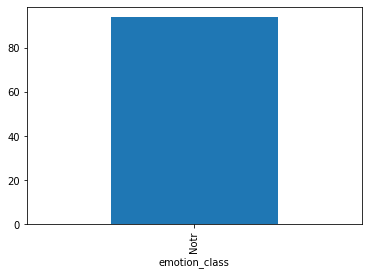

In [52]:
emotion_freq.plot.bar(x = "emotion_class",y = "id");

In [53]:
tweets = api.search(q = "#apple", lang = "en")

In [54]:
df = hashtag_df(tweets)

In [55]:
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))


df['text'] = df['text'].str.replace('[^\w\s]','')


df['text'] = df['text'].str.replace('\d','')

#stopwords
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))


from textblob import Word
#nltk.download('wordnet')
#df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

df['text'] = df['text'].str.replace('rt','')

In [56]:
df['emotion_class'] = 0

In [57]:
sentiment_score(df)

,id,text,created_at,retweeted,retweet_count,source,user_screen_name,user_followers_count,user_location,Hashtags,emotion_class
0,1552689151430070276,watcherguru us senate banking committee chair...,2022-07-28 16:15:15,False,71,Twitter Web App,serfran10,108,,"[{'text': 'Apple', 'indices': [91, 97]}, {'tex...",Notr
1,1552689072392609792,watcherguru us senate banking committee chair...,2022-07-28 16:14:57,False,71,Twitter for iPhone,ricardomillette,126,"Wisconsin, USA","[{'text': 'Apple', 'indices': [91, 97]}, {'tex...",Notr
2,1552688996794466305,century_fin slew earnings expected keep inves...,2022-07-28 16:14:39,False,2,Twitter Web App,chivellkar,30,,"[{'text': 'earnings', 'indices': [27, 36]}, {'...",Notr
3,1552688984362459136,watcherguru us senate banking committee chair...,2022-07-28 16:14:36,False,71,Twitter for Android,AmbaNsor,968,Streets of Nigeria 🇳🇬,"[{'text': 'Apple', 'indices': [91, 97]}, {'tex...",Notr
4,1552688965123461122,im banana im apple,2022-07-28 16:14:31,False,0,Twitter Web App,AlchemyItself,1,Ton 618,"[{'text': 'banana', 'indices': [8, 15]}, {'tex...",Notr
5,1552688912732127233,watcherguru us senate banking committee chair...,2022-07-28 16:14:19,False,71,Twitter for Android,PrattoMauro,117,Ciudad Autónoma de Buenos Aire,"[{'text': 'Apple', 'indices': [91, 97]}, {'tex...",Notr
6,1552688892754726918,samsung galaxy design surfaced online httpstco...,2022-07-28 16:14:14,False,0,Publer.io,akhiljoseph,377,"delhi, india","[{'text': 'Android', 'indices': [68, 76]}, {'t...",Notr
7,1552688823913648128,watcherguru us senate banking committee chair...,2022-07-28 16:13:57,False,71,Twitter Web App,EricHig75545598,112,,"[{'text': 'Apple', 'indices': [91, 97]}, {'tex...",Notr
8,1552688789159542784,samsung galaxy design surfaced online httpstco...,2022-07-28 16:13:49,False,0,Publer.io,TechnobuggTweet,154,"New Delhi, India","[{'text': 'Android', 'indices': [68, 76]}, {'t...",Notr
9,1552688771132424192,watcherguru us senate banking committee chair...,2022-07-28 16:13:45,False,71,Twitter Web App,mikespas,340,,"[{'text': 'Apple', 'indices': [91, 97]}, {'tex...",Notr


In [58]:
emotion_freq = df.groupby("emotion_class").count()["id"]

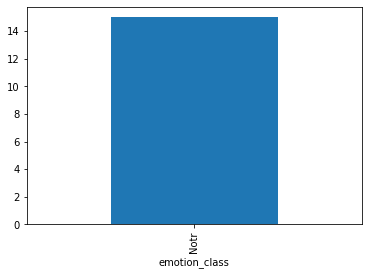

In [59]:
emotion_freq.plot.bar(x = "emotion_class",y = "id");